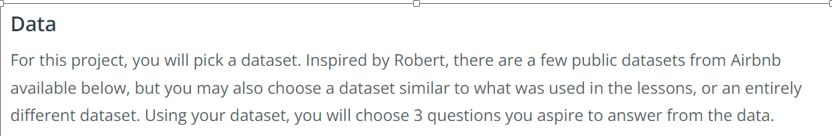

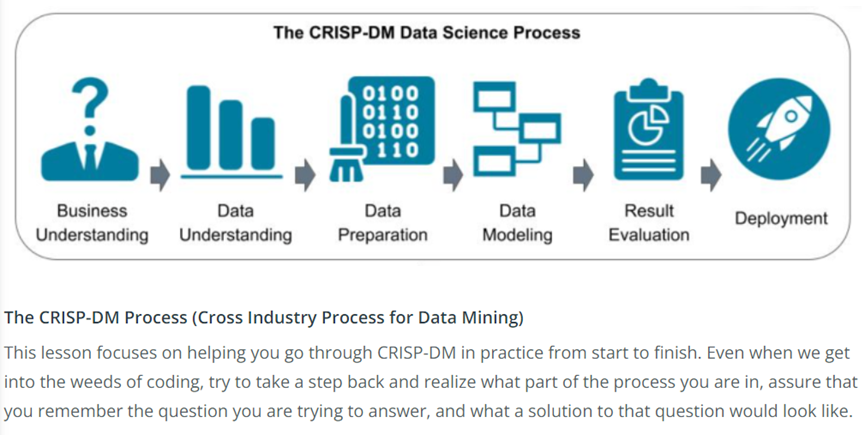

# 1. Business Understanding

- 1. what elements effect the price of the hosue the most
- 2. what elements contribute to a better earning host
- 3. what elements contribute to higher customer satisfaction
- 4. compare the two city which city do a better job

In [201]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn import linear_model

pd.set_option('expand_frame_repr', False)  # 当列太多时不换行
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 5000)  # 最多显示数据的行数

# 2. Data Understanding

- calendar.csv contians data for the whether the date is available for book and how much it wil cost
- listing.csv contains many detailed data for each lsiting Id
- review.csv contains reviews for each host by who and the date it was maded

In [2]:
boston_calendar = pd.read_csv(r'D:\金融股票\Udacity\Data Science\1. Intro to Data Science\Data\Boston Airbub Open Data\calendar.csv')
boston_listing = pd.read_csv(r'D:\金融股票\Udacity\Data Science\1. Intro to Data Science\Data\Boston Airbub Open Data\listings.csv')
boston_reviews = pd.read_csv(r'D:\金融股票\Udacity\Data Science\1. Intro to Data Science\Data\Boston Airbub Open Data\reviews.csv')

seattle_calendar = pd.read_csv(r'D:\金融股票\Udacity\Data Science\1. Intro to Data Science\Data\Seattle Airbnb Open Data\calendar.csv')
seattle_listing = pd.read_csv(r'D:\金融股票\Udacity\Data Science\1. Intro to Data Science\Data\Seattle Airbnb Open Data\listings.csv')
seattle_reviews = pd.read_csv(r'D:\金融股票\Udacity\Data Science\1. Intro to Data Science\Data\Seattle Airbnb Open Data\reviews.csv')

In [3]:
seattle_calendar.head()

listing_id        date available   price
0      241032  2016-01-04         t  $85.00
1      241032  2016-01-05         t  $85.00
2      241032  2016-01-06         f     NaN
3      241032  2016-01-07         f     NaN
4      241032  2016-01-08         f     NaN

In [4]:
seattle_listing.head(3)

id                           listing_url       scrape_id last_scraped                                 name                                            summary                                              space                                        description experiences_offered                              neighborhood_overview                                              notes                                            transit                                      thumbnail_url                                         medium_url                                        picture_url                                     xl_picture_url   host_id                                    host_url host_name  host_since                       host_location                                         host_about  host_response_time host_response_rate host_acceptance_rate host_is_superhost                                 host_thumbnail_url                                   host_picture_url host_neighbourhood  host_listings_count  host_total_listings_count                                 host_verifications host_has_profile_pic host_identity_verified                                             street neighbourhood neighbourhood_cleansed neighbourhood_group_cleansed     city state zipcode   market smart_location country_code        country   latitude   longitude is_location_exact property_type        room_type  accommodates  bathrooms  bedrooms  beds  bed_type                                          amenities  square_feet    price weekly_price monthly_price security_deposit cleaning_fee  guests_included extra_people  minimum_nights  maximum_nights calendar_updated has_availability  availability_30  availability_60  availability_90  availability_365 calendar_last_scraped  number_of_reviews first_review last_review  review_scores_rating  review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  review_scores_communication  review_scores_location  review_scores_value requires_license  license jurisdiction_names instant_bookable cancellation_policy require_guest_profile_picture require_guest_phone_verification  calculated_host_listings_count  reviews_per_month
0   241032   https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04         Stylish Queen Anne Apartment                                                NaN  Make your self at home in this charming one-be...  Make your self at home in this charming one-be...                none                                                NaN                                                NaN                                                NaN                                                NaN                                                NaN  https://a1.muscache.com/ac/pictures/67560560/c...                                                NaN    956883    https://www.airbnb.com/users/show/956883     Maija  2011-08-11  Seattle, Washington, United States  I am an artist, interior designer, and run a s...  within a few hours                96%                 100%                 f  https://a0.muscache.com/ac/users/956883/profil...  https://a0.muscache.com/ac/users/956883/profil...         Queen Anne                  3.0                        3.0               ['email', 'phone', 'reviews', 'kba']                    t                      t      Gilman Dr W, Seattle, WA 98119, United States    Queen Anne        West Queen Anne                   Queen Anne  Seattle    WA   98119  Seattle    Seattle, WA           US  United States  47.636289 -122.371025                 t     Apartment  Entire home/apt             4        1.0       1.0   1.0  Real Bed  {TV,"Cable TV",Internet,"Wireless Internet","A...          NaN   $85.00          NaN           NaN              NaN          NaN                2        $5.00               1             365      4 weeks ago                t               14               41               71               346            2016-01-04                207   2011-11-01  2

In [5]:
seattle_listing.describe()

id     scrape_id       host_id  host_listings_count  host_total_listings_count     latitude    longitude  accommodates    bathrooms     bedrooms         beds  square_feet  guests_included  minimum_nights  maximum_nights  availability_30  availability_60  availability_90  availability_365  number_of_reviews  review_scores_rating  review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  review_scores_communication  review_scores_location  review_scores_value  license  calculated_host_listings_count  reviews_per_month
count  3.818000e+03  3.818000e+03  3.818000e+03          3816.000000                3816.000000  3818.000000  3818.000000   3818.000000  3802.000000  3812.000000  3817.000000    97.000000      3818.000000     3818.000000     3818.000000      3818.000000      3818.000000      3818.000000       3818.000000        3818.000000           3171.000000             3160.000000                3165.000000            3160.000000                  3167.000000             3163.000000          3162.000000      0.0                     3818.000000        3191.000000
mean   5.550111e+06  2.016010e+13  1.578556e+07             7.157757                   7.157757    47.628961  -122.333103      3.349398     1.259469     1.307712     1.735394   854.618557         1.672603        2.369303      780.447617        16.786276        36.814825        58.082504        244.772656          22.223415             94.539262                9.636392                   9.556398               9.786709                     9.809599                9.608916             9.452245      NaN                        2.946307           2.078919
std    2.962660e+06  0.000000e+00  1.458382e+07            28.628149                  28.628149     0.043052     0.031745      1.977599     0.590369     0.883395     1.139480   671.404893         1.311040       16.305902     1683.589007        12.173637        23.337541        34.063845        126.772526          37.730892              6.606083                0.698031                   0.797274               0.595499                     0.568211                0.629053             0.750259      NaN                        5.893029           1.822348
min    3.335000e+03  2.016010e+13  4.193000e+03             1.000000                   1.000000    47.505088  -122.417219      1.000000     0.000000     0.000000     1.000000     0.000000         0.000000        1.000000        1.000000         0.000000         0.000000         0.000000          0.000000           0.000000             20.000000                2.000000                   3.000000               2.000000                     2.000000                4.000000             2.000000      NaN                        1.000000           0.020000
25%    3.258256e+06  2.016010e+13  3.275204e+06             1.000000                   1.000000    47.609418  -122.354320      2.000000     1.000000     1.000000     1.000000   420.000000         1.000000        1.000000       60.000000         2.000000        13.000000        28.000000        124.000000           2.000000             93.000000                9.000000                   9.000000              10.000000                    10.000000                9.000000             9.000000      NaN                        1.000000           0.695000
50%    6.118244e+06  2.016010e+13  1.055814e+07             1.000000                   1.000000    47.623601  -122.328874      3.000000     1.000000     1.000000     1.000000   750.000000         1.000000        2.000000     1125.000000        20.000000        46.000000        73.000000        308.000000           9.000000             96.000000               10.000000                  10.000000              10.000000                    10.000000               10.000000            10.000000      NaN                        1.000000           1.540000
75%    8.035127e+06  2.016010e+13  2.590309e+07             3.000000                   3.000000    47.662694  -122.310800      4.000

In [6]:
seattle_listing.select_dtypes(include=['object']).describe()

listing_url last_scraped                    name                                            summary                                              space                                        description experiences_offered                              neighborhood_overview                                              notes                                            transit                                      thumbnail_url                                         medium_url                                        picture_url                                     xl_picture_url                                   host_url host_name  host_since                       host_location                                         host_about host_response_time host_response_rate host_acceptance_rate host_is_superhost                                 host_thumbnail_url                                   host_picture_url host_neighbourhood                                host_verifications host_has_profile_pic host_identity_verified                                        street neighbourhood neighbourhood_cleansed neighbourhood_group_cleansed     city state zipcode   market smart_location country_code        country is_location_exact property_type        room_type  bed_type amenities    price weekly_price monthly_price security_deposit cleaning_fee extra_people calendar_updated has_availability calendar_last_scraped first_review last_review requires_license jurisdiction_names instant_bookable cancellation_policy require_guest_profile_picture require_guest_phone_verification
count                                  3818         3818                    3818                                               3641                                               3249                                               3818                3818                                               2786                                               2212                                               2884                                               3498                                               3498                                               3818                                               3498                                       3818      3816        3816                                3810                                               2959               3295               3295                 3045              3816                                               3816                                               3816               3518                                              3818                 3816                   3816                                          3818          3402                   3818                         3818     3818  3818    3811     3818           3818         3818           3818              3818          3817             3818      3818      3818     3818         2009          1517             1866         2788         3818             3818             3818                  3818         3191        3191             3818               3818             3818                3818                          3818                             3818
unique                                 3818            1                    3792                                               3478                                               3119                                               3742                   1                                               2506                                               1999                                               2574                                               3498                                               3498                                               3818                                               3498                                       2751      1466        1380                                 120                                               2011                  4                 45                  

In [7]:
seattle_reviews.head()

listing_id        id        date  reviewer_id reviewer_name                                           comments
0     7202016  38917982  2015-07-19     28943674        Bianca  Cute and cozy place. Perfect location to every...
1     7202016  39087409  2015-07-20     32440555         Frank  Kelly has a great room in a very central locat...
2     7202016  39820030  2015-07-26     37722850           Ian  Very spacious apartment, and in a great neighb...
3     7202016  40813543  2015-08-02     33671805        George  Close to Seattle Center and all it has to offe...
4     7202016  41986501  2015-08-10     34959538          Ming  Kelly was a great host and very accommodating ...

In [8]:
seattle_reviews.describe()

listing_id            id   reviewer_id
count  8.484900e+04  8.484900e+04  8.484900e+04
mean   3.005067e+06  3.058765e+07  1.701301e+07
std    2.472877e+06  1.636613e+07  1.353704e+07
min    4.291000e+03  3.721000e+03  1.500000e+01
25%    7.946330e+05  1.725127e+07  5.053141e+06
50%    2.488228e+06  3.228809e+07  1.413476e+07
75%    4.694479e+06  4.457648e+07  2.762402e+07
max    1.024814e+07  5.873651e+07  5.281274e+07

In [9]:
seattle_reviews.select_dtypes(include=['object']).describe()

date reviewer_name                                           comments
count        84849         84849                                              84831
unique        1930         14380                                              84136
top     2015-09-21         David  The host canceled this reservation the day bef...
freq           580           870                                                 57

Text(0.5, 1.0, 'listing NaN')

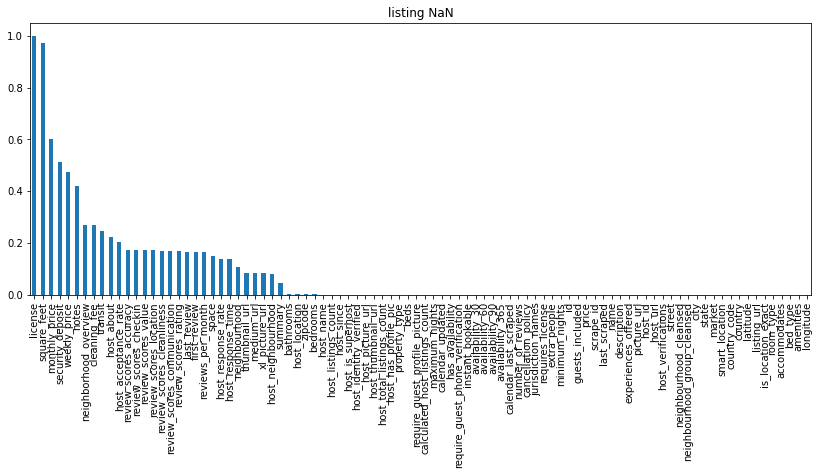

In [10]:
'''
1. drop check NaN value then drop and fix data
'''
plt.figure(figsize=(14,5))
seattle_listing.isnull().mean().sort_values(ascending=False).plot(kind = 'bar')
plt.title('listing NaN')

Text(0.5, 1.0, 'Listing NaN Top 10')

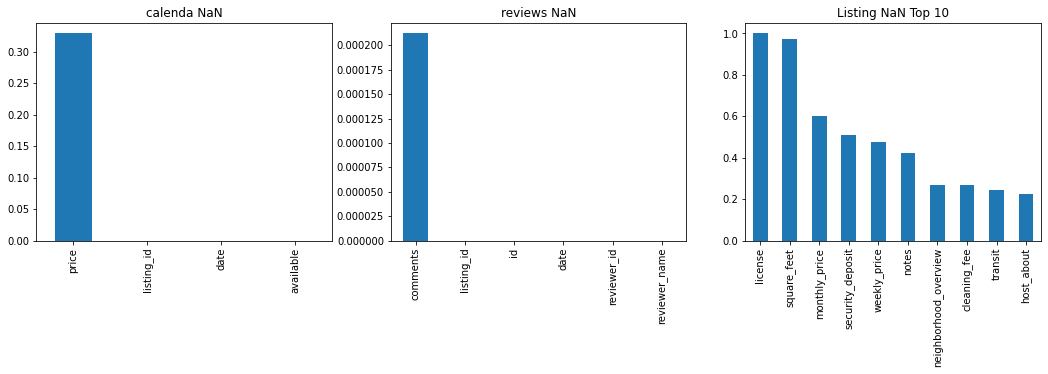

In [11]:
plt.figure(figsize=(18,4))

plt.subplot(1,3,1)
seattle_calendar.isnull().mean().sort_values(ascending=False).plot(kind = 'bar')
plt.title('calenda NaN')

plt.subplot(1,3,2)
seattle_reviews.isnull().mean().sort_values(ascending=False).plot(kind = 'bar')
plt.title('reviews NaN')

plt.subplot(1,3,3)
seattle_listing.isnull().mean().sort_values(ascending=False)[:10].plot(kind = 'bar')
plt.title('Listing NaN Top 10')

In [12]:
seattle_listing.isnull().mean().sort_values(ascending=False)[:10]

license                  1.000000
square_feet              0.974594
monthly_price            0.602672
security_deposit         0.511262
weekly_price             0.473808
notes                    0.420639
neighborhood_overview    0.270299
cleaning_fee             0.269775
transit                  0.244631
host_about               0.224987
dtype: float64

In [13]:
seattle_listing[seattle_listing.isnull().mean().sort_values(ascending=False)[:10].index].head(3)

license  square_feet monthly_price security_deposit weekly_price                                              notes                              neighborhood_overview cleaning_fee                                            transit                                         host_about
0      NaN          NaN           NaN              NaN          NaN                                                NaN                                                NaN          NaN                                                NaN  I am an artist, interior designer, and run a s...
1      NaN          NaN     $3,000.00          $100.00    $1,000.00  What's up with the free pillows?  Our home was...  Queen Anne is a wonderful, truly functional vi...       $40.00  Convenient bus stops are just down the block, ...  Living east coast/left coast/overseas.  Time i...
2      NaN          NaN           NaN        $1,000.00          NaN  Our house is located just 5 short blocks to To...  Upper Queen Anne is a charming neighborhood fu...      $300.00  A bus stop is just 2 blocks away.   Easy bus a...  i love living in Seattle.  i grew up in the mi...

As we see in the above diagram, there are missing values within our data. Especially on listing.csv for col 'license' and 'square_feet' we have over 90% of empty data. As a approach I will remove those w col and keep the rest, because as we can see even throught there are empty values but those col are still valuable to dig into.

But on the other hand there are some col with value but less usefull, such as: listing_url. For those I decide to drop too. 

# 3. Data Preparation/ Data Wrangling

In [14]:
# drop the two col we discussed 

In [15]:
urls = []
for col in seattle_listing.columns:
    words = col.split('_')
    if 'url' in words:
        urls.append(col)
        
ToDrop = ['license','square_feet','scrape_id',
          'experiences_offered','street','market',
          'smart_location','country_code','country',
          'last_scraped','host_location','calendar_updated',
          'calendar_last_scraped','host_neighbourhood','neighbourhood',
          'host_total_listings_count','first_review','last_review']
ToDrop_list = urls + ToDrop

ToDrop_list

['listing_url',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_url',
 'host_thumbnail_url',
 'host_picture_url',
 'license',
 'square_feet',
 'scrape_id',
 'experiences_offered',
 'street',
 'market',
 'smart_location',
 'country_code',
 'country',
 'last_scraped',
 'host_location',
 'calendar_updated',
 'calendar_last_scraped',
 'host_neighbourhood',
 'neighbourhood',
 'host_total_listings_count',
 'first_review',
 'last_review']

In [16]:
seattle_listing = seattle_listing.drop(columns = ToDrop_list,
                                       axis = 1)
seattle_listing = seattle_listing.rename(columns = {'id':'listing_id'})

seattle = pd.merge(seattle_calendar, seattle_listing, on = 'listing_id')

seattle.head(3)

listing_id        date available price_x                          name summary                                              space                                        description neighborhood_overview notes transit  host_id host_name  host_since                                         host_about  host_response_time host_response_rate host_acceptance_rate host_is_superhost  host_listings_count                    host_verifications host_has_profile_pic host_identity_verified neighbourhood_cleansed neighbourhood_group_cleansed     city state zipcode   latitude   longitude is_location_exact property_type        room_type  accommodates  bathrooms  bedrooms  beds  bed_type                                          amenities price_y weekly_price monthly_price security_deposit cleaning_fee  guests_included extra_people  minimum_nights  maximum_nights has_availability  availability_30  availability_60  availability_90  availability_365  number_of_reviews  review_scores_rating  review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  review_scores_communication  review_scores_location  review_scores_value requires_license jurisdiction_names instant_bookable cancellation_policy require_guest_profile_picture require_guest_phone_verification  calculated_host_listings_count  reviews_per_month
0      241032  2016-01-04         t  $85.00  Stylish Queen Anne Apartment     NaN  Make your self at home in this charming one-be...  Make your self at home in this charming one-be...                   NaN   NaN     NaN   956883     Maija  2011-08-11  I am an artist, interior designer, and run a s...  within a few hours                96%                 100%                 f                  3.0  ['email', 'phone', 'reviews', 'kba']                    t                      t        West Queen Anne                   Queen Anne  Seattle    WA   98119  47.636289 -122.371025                 t     Apartment  Entire home/apt             4        1.0       1.0   1.0  Real Bed  {TV,"Cable TV",Internet,"Wireless Internet","A...  $85.00          NaN           NaN              NaN          NaN                2        $5.00               1             365                t               14               41               71               346                207                  95.0                    10.0                       10.0                   10.0                         10.0                     9.0                 10.0                f         WASHINGTON                f            moderate                             f                                f                               2               4.07
1      241032  2016-01-05         t  $85.00  Stylish Queen Anne Apartment     NaN  Make your self at home in this charming one-be...  Make your self at home in this charming one-be...                   NaN   NaN     NaN   956883     Maija  2011-08-11  I am an artist, interior designer, and run a s...  within a few hours                96%                 100%                 f                  3.0  ['email', 'phone', 'reviews', 'kba']                    t                      t        West Queen Anne                   Queen Anne  Seattle    WA   98119  47.636289 -122.371025                 t     Apartment  Entire home/apt             4        1.0       1.0   1.0  Real Bed  {TV,"Cable TV",Internet,"Wireless Internet","A...  $85.00          NaN           NaN              NaN          NaN                2        $5.00               1             365                t               14               41               71               346                207                  95.0                    10.0                       10.0                   10.0                         10.0                     9.0                 10.0                f         WASHINGTON                f            moderate                             f                                f                               2               4.07
2      241032  2016-01-06         f     

In [17]:
# since words and long sentence are quite different compare with object and number
# split data into available, available_words and not-available, not-available_words
words_cols = ['name','summary','space','description','neighborhood_overview','notes','transit','host_about']

av_seattle = seattle.query('available == "t"').drop(columns = words_cols, axis = 1)
avw_seattle = seattle.query('available == "t"')[words_cols]
nav_seatle = seattle.query('available == "f"').drop(columns = words_cols, axis = 1)
navw_seatle = seattle.query('available == "f"')[words_cols]

In [18]:
av_seattle.head(3)

listing_id        date available price_x  host_id host_name  host_since  host_response_time host_response_rate host_acceptance_rate host_is_superhost  host_listings_count                    host_verifications host_has_profile_pic host_identity_verified neighbourhood_cleansed neighbourhood_group_cleansed     city state zipcode   latitude   longitude is_location_exact property_type        room_type  accommodates  bathrooms  bedrooms  beds  bed_type                                          amenities price_y weekly_price monthly_price security_deposit cleaning_fee  guests_included extra_people  minimum_nights  maximum_nights has_availability  availability_30  availability_60  availability_90  availability_365  number_of_reviews  review_scores_rating  review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  review_scores_communication  review_scores_location  review_scores_value requires_license jurisdiction_names instant_bookable cancellation_policy require_guest_profile_picture require_guest_phone_verification  calculated_host_listings_count  reviews_per_month
0      241032  2016-01-04         t  $85.00   956883     Maija  2011-08-11  within a few hours                96%                 100%                 f                  3.0  ['email', 'phone', 'reviews', 'kba']                    t                      t        West Queen Anne                   Queen Anne  Seattle    WA   98119  47.636289 -122.371025                 t     Apartment  Entire home/apt             4        1.0       1.0   1.0  Real Bed  {TV,"Cable TV",Internet,"Wireless Internet","A...  $85.00          NaN           NaN              NaN          NaN                2        $5.00               1             365                t               14               41               71               346                207                  95.0                    10.0                       10.0                   10.0                         10.0                     9.0                 10.0                f         WASHINGTON                f            moderate                             f                                f                               2               4.07
1      241032  2016-01-05         t  $85.00   956883     Maija  2011-08-11  within a few hours                96%                 100%                 f                  3.0  ['email', 'phone', 'reviews', 'kba']                    t                      t        West Queen Anne                   Queen Anne  Seattle    WA   98119  47.636289 -122.371025                 t     Apartment  Entire home/apt             4        1.0       1.0   1.0  Real Bed  {TV,"Cable TV",Internet,"Wireless Internet","A...  $85.00          NaN           NaN              NaN          NaN                2        $5.00               1             365                t               14               41               71               346                207                  95.0                    10.0                       10.0                   10.0                         10.0                     9.0                 10.0                f         WASHINGTON                f            moderate                             f                                f                               2               4.07
9      241032  2016-01-13         t  $85.00   956883     Maija  2011-08-11  within a few hours                96%                 100%                 f                  3.0  ['email', 'phone', 'reviews', 'kba']                    t                      t        West Queen Anne                   Queen Anne  Seattle    WA   98119  47.636289 -122.371025                 t     Apartment  Entire home/apt             4        1.0       1.0   1.0  Real Bed  {TV,"Cable TV",Internet,"Wireless Internet","A...  $85.00          NaN           NaN              NaN          NaN                2        $5.00               1             365                t               14               41               71               346    

In [19]:
avw_seattle.head(3)

name summary                                              space                                        description neighborhood_overview notes transit                                         host_about
0  Stylish Queen Anne Apartment     NaN  Make your self at home in this charming one-be...  Make your self at home in this charming one-be...                   NaN   NaN     NaN  I am an artist, interior designer, and run a s...
1  Stylish Queen Anne Apartment     NaN  Make your self at home in this charming one-be...  Make your self at home in this charming one-be...                   NaN   NaN     NaN  I am an artist, interior designer, and run a s...
9  Stylish Queen Anne Apartment     NaN  Make your self at home in this charming one-be...  Make your self at home in this charming one-be...                   NaN   NaN     NaN  I am an artist, interior designer, and run a s...

In [20]:
# convert date to month and year
av_seattle['month'] = av_seattle['date'].apply(lambda x: int(x.split('-')[1]))
av_seattle['year'] = av_seattle['date'].apply(lambda x: int(x.split('-')[0]))
av_seattle = av_seattle.drop(columns = 'date',
                            axis = 1)

# convert host_since  to host_since_year
av_seattle['host_since'] = av_seattle['host_since'].fillna('0')
av_seattle['host_since_year'] = av_seattle['host_since'].apply(lambda x: int(x.split('-')[0]))
av_seattle = av_seattle.drop(columns = 'host_since',
                            axis = 1)


In [21]:
av_seattle.head(3)

listing_id available price_x  host_id host_name  host_response_time host_response_rate host_acceptance_rate host_is_superhost  host_listings_count                    host_verifications host_has_profile_pic host_identity_verified neighbourhood_cleansed neighbourhood_group_cleansed     city state zipcode   latitude   longitude is_location_exact property_type        room_type  accommodates  bathrooms  bedrooms  beds  bed_type                                          amenities price_y weekly_price monthly_price security_deposit cleaning_fee  guests_included extra_people  minimum_nights  maximum_nights has_availability  availability_30  availability_60  availability_90  availability_365  number_of_reviews  review_scores_rating  review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  review_scores_communication  review_scores_location  review_scores_value requires_license jurisdiction_names instant_bookable cancellation_policy require_guest_profile_picture require_guest_phone_verification  calculated_host_listings_count  reviews_per_month  month  year  host_since_year
0      241032         t  $85.00   956883     Maija  within a few hours                96%                 100%                 f                  3.0  ['email', 'phone', 'reviews', 'kba']                    t                      t        West Queen Anne                   Queen Anne  Seattle    WA   98119  47.636289 -122.371025                 t     Apartment  Entire home/apt             4        1.0       1.0   1.0  Real Bed  {TV,"Cable TV",Internet,"Wireless Internet","A...  $85.00          NaN           NaN              NaN          NaN                2        $5.00               1             365                t               14               41               71               346                207                  95.0                    10.0                       10.0                   10.0                         10.0                     9.0                 10.0                f         WASHINGTON                f            moderate                             f                                f                               2               4.07      1  2016             2011
1      241032         t  $85.00   956883     Maija  within a few hours                96%                 100%                 f                  3.0  ['email', 'phone', 'reviews', 'kba']                    t                      t        West Queen Anne                   Queen Anne  Seattle    WA   98119  47.636289 -122.371025                 t     Apartment  Entire home/apt             4        1.0       1.0   1.0  Real Bed  {TV,"Cable TV",Internet,"Wireless Internet","A...  $85.00          NaN           NaN              NaN          NaN                2        $5.00               1             365                t               14               41               71               346                207                  95.0                    10.0                       10.0                   10.0                         10.0                     9.0                 10.0                f         WASHINGTON                f            moderate                             f                                f                               2               4.07      1  2016             2011
9      241032         t  $85.00   956883     Maija  within a few hours                96%                 100%                 f                  3.0  ['email', 'phone', 'reviews', 'kba']                    t                      t        West Queen Anne                   Queen Anne  Seattle    WA   98119  47.636289 -122.371025                 t     Apartment  Entire home/apt             4        1.0       1.0   1.0  Real Bed  {TV,"Cable TV",Internet,"Wireless Internet","A...  $85.00          NaN           NaN              NaN          NaN                2        $5.00               1             365                t               14               41               71               346          

In [22]:
'''
change host_verifications to dummy
'''

def get_list(x):
    list = []
    for method in x.split("', '"):
        method = method.replace("['",'').replace("']",'')
        list.append(method)

    return list
# change host_verifications to dummy

# get all the unique method of verification
host_verifications = []
for methods in av_seattle.host_verifications.unique():
    methods = methods.split("', '")
    l = []
    for method in methods:
        method = method.replace("['",'').replace("']",'')
        if method not in host_verifications:
            host_verifications.append(method)
            
# create new cols store dummy variable
for c in host_verifications:
    av_seattle[c] = 0
    
# change 'host_verifications' col to right list format
av_seattle['host_verifications'] = av_seattle.host_verifications.apply(lambda x: get_list(x))

# sign value for each dummy col
row = 0
fin = 1
start = time.time()
for val_list in av_seattle.host_verifications.values:
    for val in val_list:
        av_seattle[val].iloc[row] = 1
    row += 1
    if row % 10000 == 0:
        print('finish {}, time = {}'.format(fin,time.time() - start))
        fin += 1
    
# rename all the col with right name and drop 'host_verifications'
# create rename list to store all the right name
rename = []
for name in host_verifications:
    name = 'host_verifications' + '_' + name
    rename.append(name)
# create rename dict to store right pair of old name and new name 
rename_dict = {}
for val in zip(host_verifications,rename):
    rename_dict[val[0]] = val[1] 
av_seattle = av_seattle.rename(columns = rename_dict)
# drop
av_seattle.drop(columns = 'host_verifications',
                axis = 1)

c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


finish 1, time = 34.7288453578949
finish 2, time = 70.48012709617615
finish 3, time = 107.00569176673889
finish 4, time = 141.35749053955078
finish 5, time = 176.95417284965515
finish 6, time = 216.9193470478058
finish 7, time = 251.8490333557129
finish 8, time = 289.8120791912079
finish 9, time = 329.0422089099884
finish 10, time = 365.94752168655396
finish 11, time = 401.03664779663086
finish 12, time = 434.7029333114624
finish 13, time = 468.4606373310089
finish 14, time = 497.78930044174194
finish 15, time = 535.9149787425995
finish 16, time = 573.0995533466339
finish 17, time = 609.9735119342804
finish 18, time = 642.4997625350952
finish 19, time = 679.43931889534
finish 20, time = 716.9899456501007
finish 21, time = 754.2471206188202
finish 22, time = 791.8224654197693
finish 23, time = 828.2029523849487
finish 24, time = 866.1865589618683
finish 25, time = 897.5268838405609
finish 26, time = 932.0442521572113
finish 27, time = 972.371152639389
finish 28, time = 1008.209299802780

listing_id available price_x   host_id host_name  host_response_time host_response_rate host_acceptance_rate host_is_superhost  host_listings_count host_has_profile_pic host_identity_verified neighbourhood_cleansed neighbourhood_group_cleansed     city state zipcode   latitude   longitude is_location_exact property_type        room_type  accommodates  bathrooms  bedrooms  beds  bed_type                                          amenities price_y weekly_price monthly_price security_deposit cleaning_fee  guests_included extra_people  minimum_nights  maximum_nights has_availability  availability_30  availability_60  availability_90  availability_365  number_of_reviews  review_scores_rating  review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  review_scores_communication  review_scores_location  review_scores_value requires_license jurisdiction_names instant_bookable cancellation_policy require_guest_profile_picture require_guest_phone_verification  calculated_host_listings_count  reviews_per_month  month  year  host_since_year  host_verifications_email  host_verifications_phone  host_verifications_reviews  host_verifications_kba  host_verifications_facebook  host_verifications_linkedin  host_verifications_jumio  host_verifications_google  host_verifications_manual_offline  host_verifications_amex  host_verifications_manual_online  host_verifications_sent_id  host_verifications_photographer  host_verifications_[]  host_verifications_None  host_verifications_weibo
0            241032         t  $85.00    956883     Maija  within a few hours                96%                 100%                 f                  3.0                    t                      t        West Queen Anne                   Queen Anne  Seattle    WA   98119  47.636289 -122.371025                 t     Apartment  Entire home/apt             4        1.0       1.0   1.0  Real Bed  {TV,"Cable TV",Internet,"Wireless Internet","A...  $85.00          NaN           NaN              NaN          NaN                2        $5.00               1             365                t               14               41               71               346                207                  95.0                    10.0                       10.0                   10.0                         10.0                     9.0                 10.0                f         WASHINGTON                f            moderate                             f                                f                               2               4.07      1  2016             2011                         1                         1                           1                       1                            0                            0                         0                          0                                  0                        0                                 0                           0                                0                      0                        0                         0
1            241032         t  $85.00    956883     Maija  within a few hours                96%                 100%                 f                  3.0                    t                      t        West Queen Anne                   Queen Anne  Seattle    WA   98119  47.636289 -122.371025                 t     Apartment  Entire home/apt             4        1.0       1.0   1.0  Real Bed  {TV,"Cable TV",Internet,"Wireless Internet","A...  $85.00          NaN           NaN              NaN          NaN                2        $5.00               1             365                t               14               41               71               346                207                  95.0                    10.0                       10.0                   10.0                         10.0                     9.0                 10.0                f         WASHINGTON                f            moderate                             f                             

In [23]:
av_seattle.head(3)

listing_id available price_x  host_id host_name  host_response_time host_response_rate host_acceptance_rate host_is_superhost  host_listings_count            host_verifications host_has_profile_pic host_identity_verified neighbourhood_cleansed neighbourhood_group_cleansed     city state zipcode   latitude   longitude is_location_exact property_type        room_type  accommodates  bathrooms  bedrooms  beds  bed_type                                          amenities price_y weekly_price monthly_price security_deposit cleaning_fee  guests_included extra_people  minimum_nights  maximum_nights has_availability  availability_30  availability_60  availability_90  availability_365  number_of_reviews  review_scores_rating  review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  review_scores_communication  review_scores_location  review_scores_value requires_license jurisdiction_names instant_bookable cancellation_policy require_guest_profile_picture require_guest_phone_verification  calculated_host_listings_count  reviews_per_month  month  year  host_since_year  host_verifications_email  host_verifications_phone  host_verifications_reviews  host_verifications_kba  host_verifications_facebook  host_verifications_linkedin  host_verifications_jumio  host_verifications_google  host_verifications_manual_offline  host_verifications_amex  host_verifications_manual_online  host_verifications_sent_id  host_verifications_photographer  host_verifications_[]  host_verifications_None  host_verifications_weibo
0      241032         t  $85.00   956883     Maija  within a few hours                96%                 100%                 f                  3.0  [email, phone, reviews, kba]                    t                      t        West Queen Anne                   Queen Anne  Seattle    WA   98119  47.636289 -122.371025                 t     Apartment  Entire home/apt             4        1.0       1.0   1.0  Real Bed  {TV,"Cable TV",Internet,"Wireless Internet","A...  $85.00          NaN           NaN              NaN          NaN                2        $5.00               1             365                t               14               41               71               346                207                  95.0                    10.0                       10.0                   10.0                         10.0                     9.0                 10.0                f         WASHINGTON                f            moderate                             f                                f                               2               4.07      1  2016             2011                         1                         1                           1                       1                            0                            0                         0                          0                                  0                        0                                 0                           0                                0                      0                        0                         0
1      241032         t  $85.00   956883     Maija  within a few hours                96%                 100%                 f                  3.0  [email, phone, reviews, kba]                    t                      t        West Queen Anne                   Queen Anne  Seattle    WA   98119  47.636289 -122.371025                 t     Apartment  Entire home/apt             4        1.0       1.0   1.0  Real Bed  {TV,"Cable TV",Internet,"Wireless Internet","A...  $85.00          NaN           NaN              NaN          NaN                2        $5.00               1             365                t               14               41               71               346                207                  95.0                    10.0                       10.0                   10.0                         10.0                     9.0                 10.0                f         WASHINGTON                f    

In [24]:
'''
change amenities to dummy
'''

def get_list_amenities(x):
    list = []
    for method in x.split(','):
        method = method.replace('{','').replace('}','').replace('"','')
        list.append(method)

    return list

# get all the unique method of amenities
amenities = []
for methods in av_seattle.amenities.unique():
    methods = methods.split(',')
    for method in methods:
        method = method.replace('{','').replace('}','').replace('"','')
        if method not in amenities:
            amenities.append(method)

# create new cols store dummy variable
for c in amenities:
    av_seattle[c] = 0

# change 'amenities' col to right list format
av_seattle['amenities'] = av_seattle['amenities'].apply(lambda x: get_list_amenities(x))

# sign value for each dummy col
row = 0
fin = 1
start = time.time()
for val_list in av_seattle.amenities.values:
    for val in val_list:
        av_seattle[val].iloc[row] = 1
    row += 1
    if row % 10000 == 0:
        print('finish {}, time = {}'.format(fin,time.time() - start))
        fin += 1

# rename all the col with right name and drop 'amenities'
# create rename list to store all the right name
rename = []
for name in amenities:
    name = 'amenities' + '_' + name
    rename.append(name)
# create rename dict to store right pair of old name and new name
rename_dict = {}
for val in zip(amenities,rename):
    rename_dict[val[0]] = val[1]
av_seattle = av_seattle.rename(columns = rename_dict)
# drop
av_seattle.drop(columns = 'amenities',
                axis = 1)

c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


finish 1, time = 114.51357746124268
finish 2, time = 223.55247402191162
finish 3, time = 330.4132845401764
finish 4, time = 437.93996381759644
finish 5, time = 543.3532056808472
finish 6, time = 649.0896980762482
finish 7, time = 767.8725843429565
finish 8, time = 866.8841829299927
finish 9, time = 966.5004935264587
finish 10, time = 1069.082867860794
finish 11, time = 1169.8045077323914
finish 12, time = 1273.5064663887024
finish 13, time = 1386.9573938846588
finish 14, time = 1491.9896790981293
finish 15, time = 1606.492663860321
finish 16, time = 1713.7030556201935
finish 17, time = 1829.3195450305939
finish 18, time = 1923.7722039222717
finish 19, time = 2013.7088465690613
finish 20, time = 2111.826383113861
finish 21, time = 2218.4240159988403
finish 22, time = 2315.132716178894
finish 23, time = 2416.750326156616
finish 24, time = 2518.9690396785736
finish 25, time = 2619.272320985794
finish 26, time = 2717.2354865074158
finish 27, time = 2850.433681488037
finish 28, time = 2947.

listing_id available price_x   host_id host_name  host_response_time host_response_rate host_acceptance_rate host_is_superhost  host_listings_count            host_verifications host_has_profile_pic host_identity_verified neighbourhood_cleansed neighbourhood_group_cleansed     city state zipcode   latitude   longitude is_location_exact property_type        room_type  accommodates  bathrooms  bedrooms  beds  bed_type price_y weekly_price monthly_price security_deposit cleaning_fee  guests_included extra_people  minimum_nights  maximum_nights has_availability  availability_30  availability_60  availability_90  availability_365  number_of_reviews  review_scores_rating  review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  review_scores_communication  review_scores_location  review_scores_value requires_license jurisdiction_names instant_bookable cancellation_policy require_guest_profile_picture require_guest_phone_verification  calculated_host_listings_count  reviews_per_month  month  year  host_since_year  host_verifications_email  host_verifications_phone  host_verifications_reviews  host_verifications_kba  host_verifications_facebook  host_verifications_linkedin  host_verifications_jumio  host_verifications_google  host_verifications_manual_offline  host_verifications_amex  host_verifications_manual_online  host_verifications_sent_id  host_verifications_photographer  host_verifications_[]  host_verifications_None  host_verifications_weibo  amenities_TV  amenities_Cable TV  amenities_Internet  amenities_Wireless Internet  amenities_Air Conditioning  amenities_Kitchen  amenities_Heating  amenities_Family/Kid Friendly  amenities_Washer  amenities_Dryer  amenities_Free Parking on Premises  amenities_Buzzer/Wireless Intercom  amenities_Smoke Detector  amenities_Carbon Monoxide Detector  amenities_First Aid Kit  amenities_Safety Card  amenities_Fire Extinguisher  amenities_Essentials  amenities_Pets Allowed  amenities_Pets live on this property  amenities_Dog(s)  amenities_Cat(s)  amenities_Hot Tub  amenities_Indoor Fireplace  amenities_Shampoo  amenities_Breakfast  amenities_24-Hour Check-in  amenities_Hangers  amenities_Hair Dryer  amenities_Iron  amenities_Laptop Friendly Workspace  amenities_Suitable for Events  amenities_Elevator in Building  amenities_Lock on Bedroom Door  amenities_Wheelchair Accessible  amenities_Gym  amenities_  amenities_Pool  amenities_Smoking Allowed  amenities_Other pet(s)  amenities_Doorman  amenities_Washer / Dryer
0            241032         t  $85.00    956883     Maija  within a few hours                96%                 100%                 f                  3.0  [email, phone, reviews, kba]                    t                      t        West Queen Anne                   Queen Anne  Seattle    WA   98119  47.636289 -122.371025                 t     Apartment  Entire home/apt             4        1.0       1.0   1.0  Real Bed  $85.00          NaN           NaN              NaN          NaN                2        $5.00               1             365                t               14               41               71               346                207                  95.0                    10.0                       10.0                   10.0                         10.0                     9.0                 10.0                f         WASHINGTON                f            moderate                             f                                f                               2               4.07      1  2016             2011                         1                         1                           1                       1                            0                            0                         0                          0                                  0                        0                                 0                           0                                0                      0                        0                         0    

In [160]:
av_seattle = pd.read_pickle(r'D:\金融股票\Udacity\Data Science\1. Intro to Data Science\4. Project - Writing a Data Scientist Blog Post\jupyter\newss.pkl')

In [161]:
av_seattle.head(3)

listing_id available price_x  host_id host_name  host_response_time host_response_rate host_acceptance_rate host_is_superhost  host_listings_count            host_verifications host_has_profile_pic host_identity_verified neighbourhood_cleansed neighbourhood_group_cleansed     city state zipcode   latitude   longitude is_location_exact property_type        room_type  accommodates  bathrooms  bedrooms  beds  bed_type                                          amenities price_y weekly_price monthly_price security_deposit cleaning_fee  guests_included extra_people  minimum_nights  maximum_nights has_availability  availability_30  availability_60  availability_90  availability_365  number_of_reviews  review_scores_rating  review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  review_scores_communication  review_scores_location  review_scores_value requires_license jurisdiction_names instant_bookable cancellation_policy require_guest_profile_picture require_guest_phone_verification  calculated_host_listings_count  reviews_per_month  month  year  host_since_year  host_verifications_email  host_verifications_phone  host_verifications_reviews  host_verifications_kba  host_verifications_facebook  host_verifications_linkedin  host_verifications_jumio  host_verifications_google  host_verifications_manual_offline  host_verifications_amex  host_verifications_manual_online  host_verifications_sent_id  host_verifications_photographer  host_verifications_[]  host_verifications_None  host_verifications_weibo  amenities_TV  amenities_Cable TV  amenities_Internet  amenities_Wireless Internet  amenities_Air Conditioning  amenities_Kitchen  amenities_Heating  amenities_Family/Kid Friendly  amenities_Washer  amenities_Dryer  amenities_Free Parking on Premises  amenities_Buzzer/Wireless Intercom  amenities_Smoke Detector  amenities_Carbon Monoxide Detector  amenities_First Aid Kit  amenities_Safety Card  amenities_Fire Extinguisher  amenities_Essentials  amenities_Pets Allowed  amenities_Pets live on this property  amenities_Dog(s)  amenities_Cat(s)  amenities_Hot Tub  amenities_Indoor Fireplace  amenities_Shampoo  amenities_Breakfast  amenities_24-Hour Check-in  amenities_Hangers  amenities_Hair Dryer  amenities_Iron  amenities_Laptop Friendly Workspace  amenities_Suitable for Events  amenities_Elevator in Building  amenities_Lock on Bedroom Door  amenities_Wheelchair Accessible  amenities_Gym  amenities_  amenities_Pool  amenities_Smoking Allowed  amenities_Other pet(s)  amenities_Doorman  amenities_Washer / Dryer
0      241032         t  $85.00   956883     Maija  within a few hours                96%                 100%                 f                  3.0  [email, phone, reviews, kba]                    t                      t        West Queen Anne                   Queen Anne  Seattle    WA   98119  47.636289 -122.371025                 t     Apartment  Entire home/apt             4        1.0       1.0   1.0  Real Bed  [TV, Cable TV, Internet, Wireless Internet, Ai...  $85.00          NaN           NaN              NaN          NaN                2        $5.00               1             365                t               14               41               71               346                207                  95.0                    10.0                       10.0                   10.0                         10.0                     9.0                 10.0                f         WASHINGTON                f            moderate                             f                                f                               2               4.07      1  2016             2011                         1                         1                           1                       1                            0                            0                         0                          0                                  0                        0                                 0                           0                 

In [162]:
av_seattle = av_seattle.drop(['host_verifications','amenities'],
                              axis=1)
# convert the rest categorical to dummy
dummy_col = ['host_response_time','room_type','property_type','neighbourhood_cleansed',
             'neighbourhood_group_cleansed','city','state','bed_type','jurisdiction_names',
             'cancellation_policy','host_is_superhost','host_has_profile_pic','host_identity_verified',
             'is_location_exact','has_availability','requires_license','instant_bookable','require_guest_profile_picture',
             'require_guest_phone_verification']
av_seattle = pd.concat([av_seattle.drop(dummy_col,axis = 1),pd.get_dummies(av_seattle[dummy_col])],axis=1)

In [163]:
av_seattle.head(3)

listing_id available price_x  host_id host_name host_response_rate host_acceptance_rate  host_listings_count zipcode   latitude   longitude  accommodates  bathrooms  bedrooms  beds price_y weekly_price monthly_price security_deposit cleaning_fee  guests_included extra_people  minimum_nights  maximum_nights  availability_30  availability_60  availability_90  availability_365  number_of_reviews  review_scores_rating  review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  review_scores_communication  review_scores_location  review_scores_value  calculated_host_listings_count  reviews_per_month  month  year  host_since_year  host_verifications_email  host_verifications_phone  host_verifications_reviews  host_verifications_kba  host_verifications_facebook  host_verifications_linkedin  host_verifications_jumio  host_verifications_google  host_verifications_manual_offline  host_verifications_amex  host_verifications_manual_online  host_verifications_sent_id  host_verifications_photographer  host_verifications_[]  host_verifications_None  host_verifications_weibo  amenities_TV  amenities_Cable TV  amenities_Internet  amenities_Wireless Internet  amenities_Air Conditioning  amenities_Kitchen  amenities_Heating  amenities_Family/Kid Friendly  amenities_Washer  amenities_Dryer  amenities_Free Parking on Premises  amenities_Buzzer/Wireless Intercom  amenities_Smoke Detector  amenities_Carbon Monoxide Detector  amenities_First Aid Kit  amenities_Safety Card  amenities_Fire Extinguisher  amenities_Essentials  amenities_Pets Allowed  amenities_Pets live on this property  amenities_Dog(s)  amenities_Cat(s)  amenities_Hot Tub  amenities_Indoor Fireplace  amenities_Shampoo  amenities_Breakfast  amenities_24-Hour Check-in  amenities_Hangers  amenities_Hair Dryer  amenities_Iron  amenities_Laptop Friendly Workspace  amenities_Suitable for Events  amenities_Elevator in Building  amenities_Lock on Bedroom Door  amenities_Wheelchair Accessible  amenities_Gym  amenities_  amenities_Pool  amenities_Smoking Allowed  amenities_Other pet(s)  amenities_Doorman  amenities_Washer / Dryer  host_response_time_a few days or more  host_response_time_within a day  host_response_time_within a few hours  host_response_time_within an hour  room_type_Entire home/apt  room_type_Private room  room_type_Shared room  property_type_Apartment  property_type_Bed & Breakfast  property_type_Boat  property_type_Bungalow  property_type_Cabin  property_type_Camper/RV  property_type_Chalet  property_type_Condominium  property_type_Dorm  property_type_House  property_type_Loft  property_type_Other  property_type_Tent  property_type_Townhouse  property_type_Treehouse  property_type_Yurt  neighbourhood_cleansed_Adams  neighbourhood_cleansed_Alki  neighbourhood_cleansed_Arbor Heights  neighbourhood_cleansed_Atlantic  neighbourhood_cleansed_Belltown  neighbourhood_cleansed_Bitter Lake  neighbourhood_cleansed_Briarcliff  neighbourhood_cleansed_Brighton  neighbourhood_cleansed_Broadview  neighbourhood_cleansed_Broadway  neighbourhood_cleansed_Bryant  neighbourhood_cleansed_Cedar Park  neighbourhood_cleansed_Central Business District  neighbourhood_cleansed_Columbia City  neighbourhood_cleansed_Crown Hill  neighbourhood_cleansed_Dunlap  neighbourhood_cleansed_East Queen Anne  neighbourhood_cleansed_Eastlake  neighbourhood_cleansed_Fairmount Park  neighbourhood_cleansed_Fauntleroy  neighbourhood_cleansed_First Hill  neighbourhood_cleansed_Fremont  neighbourhood_cleansed_Gatewood  neighbourhood_cleansed_Genesee  neighbourhood_cleansed_Georgetown  neighbourhood_cleansed_Green Lake  neighbourhood_cleansed_Greenwood  neighbourhood_cleansed_Haller Lake  neighbourhood_cleansed_Harrison/Denny-Blaine  neighbourhood_cleansed_High Point  neighbourhood_cleansed_Highland Park  neighbourhood_cleansed_Holly Park  neighbourhood_cleansed_Industrial District  neighbourhood_cleansed_Interbay  neighbourhood_cleansed_International District  neighbourhood_cleansed_Laurelhurst  neighbourhoo

In [164]:
# change all the object to number
av_seattle['host_response_rate'] = av_seattle['host_response_rate'].fillna('0')
av_seattle['host_response_rate'] = av_seattle['host_response_rate'].apply(lambda x: float(x.replace('%',''))/100)

av_seattle['host_acceptance_rate'] = av_seattle['host_acceptance_rate'].fillna('0')
av_seattle['host_acceptance_rate'] = av_seattle['host_acceptance_rate'].apply(lambda x: float(x.replace('%',''))/100)

av_seattle['price_x'] = av_seattle['price_x'].apply(lambda x: float(x.split('$')[1].replace(',','')))
av_seattle['extra_people'] = av_seattle['extra_people'].apply(lambda x: float(x.split('$')[1].replace(',','')))

In [165]:
av_seattle.head(3)

listing_id available  price_x  host_id host_name  host_response_rate  host_acceptance_rate  host_listings_count zipcode   latitude   longitude  accommodates  bathrooms  bedrooms  beds price_y weekly_price monthly_price security_deposit cleaning_fee  guests_included  extra_people  minimum_nights  maximum_nights  availability_30  availability_60  availability_90  availability_365  number_of_reviews  review_scores_rating  review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  review_scores_communication  review_scores_location  review_scores_value  calculated_host_listings_count  reviews_per_month  month  year  host_since_year  host_verifications_email  host_verifications_phone  host_verifications_reviews  host_verifications_kba  host_verifications_facebook  host_verifications_linkedin  host_verifications_jumio  host_verifications_google  host_verifications_manual_offline  host_verifications_amex  host_verifications_manual_online  host_verifications_sent_id  host_verifications_photographer  host_verifications_[]  host_verifications_None  host_verifications_weibo  amenities_TV  amenities_Cable TV  amenities_Internet  amenities_Wireless Internet  amenities_Air Conditioning  amenities_Kitchen  amenities_Heating  amenities_Family/Kid Friendly  amenities_Washer  amenities_Dryer  amenities_Free Parking on Premises  amenities_Buzzer/Wireless Intercom  amenities_Smoke Detector  amenities_Carbon Monoxide Detector  amenities_First Aid Kit  amenities_Safety Card  amenities_Fire Extinguisher  amenities_Essentials  amenities_Pets Allowed  amenities_Pets live on this property  amenities_Dog(s)  amenities_Cat(s)  amenities_Hot Tub  amenities_Indoor Fireplace  amenities_Shampoo  amenities_Breakfast  amenities_24-Hour Check-in  amenities_Hangers  amenities_Hair Dryer  amenities_Iron  amenities_Laptop Friendly Workspace  amenities_Suitable for Events  amenities_Elevator in Building  amenities_Lock on Bedroom Door  amenities_Wheelchair Accessible  amenities_Gym  amenities_  amenities_Pool  amenities_Smoking Allowed  amenities_Other pet(s)  amenities_Doorman  amenities_Washer / Dryer  host_response_time_a few days or more  host_response_time_within a day  host_response_time_within a few hours  host_response_time_within an hour  room_type_Entire home/apt  room_type_Private room  room_type_Shared room  property_type_Apartment  property_type_Bed & Breakfast  property_type_Boat  property_type_Bungalow  property_type_Cabin  property_type_Camper/RV  property_type_Chalet  property_type_Condominium  property_type_Dorm  property_type_House  property_type_Loft  property_type_Other  property_type_Tent  property_type_Townhouse  property_type_Treehouse  property_type_Yurt  neighbourhood_cleansed_Adams  neighbourhood_cleansed_Alki  neighbourhood_cleansed_Arbor Heights  neighbourhood_cleansed_Atlantic  neighbourhood_cleansed_Belltown  neighbourhood_cleansed_Bitter Lake  neighbourhood_cleansed_Briarcliff  neighbourhood_cleansed_Brighton  neighbourhood_cleansed_Broadview  neighbourhood_cleansed_Broadway  neighbourhood_cleansed_Bryant  neighbourhood_cleansed_Cedar Park  neighbourhood_cleansed_Central Business District  neighbourhood_cleansed_Columbia City  neighbourhood_cleansed_Crown Hill  neighbourhood_cleansed_Dunlap  neighbourhood_cleansed_East Queen Anne  neighbourhood_cleansed_Eastlake  neighbourhood_cleansed_Fairmount Park  neighbourhood_cleansed_Fauntleroy  neighbourhood_cleansed_First Hill  neighbourhood_cleansed_Fremont  neighbourhood_cleansed_Gatewood  neighbourhood_cleansed_Genesee  neighbourhood_cleansed_Georgetown  neighbourhood_cleansed_Green Lake  neighbourhood_cleansed_Greenwood  neighbourhood_cleansed_Haller Lake  neighbourhood_cleansed_Harrison/Denny-Blaine  neighbourhood_cleansed_High Point  neighbourhood_cleansed_Highland Park  neighbourhood_cleansed_Holly Park  neighbourhood_cleansed_Industrial District  neighbourhood_cleansed_Interbay  neighbourhood_cleansed_International District  neighbourhood_cleansed_Laurelhurst  neighbou

In [166]:
def toNumber(x):
    if type(x) == str:
        x = float(x.replace('\n','').replace(',','').replace('$',''))
    elif type(x) == float:
        x = 0

    return x

# fillna with zero and find all the object and change them to right format
av_seattle = av_seattle.fillna(0)

obj_col = []
for col in av_seattle.columns:
    if av_seattle[col].dtypes == 'object':
        obj_col.append(col)
print(obj_col)

drop = ['available', 'host_name','price_y']
for c in drop:
    obj_col.remove(c)
print(obj_col)

for change in obj_col:
    av_seattle[change] = av_seattle[change].apply(lambda x: toNumber(x))


['available', 'host_name', 'zipcode', 'price_y', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee']
['zipcode', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee']


In [170]:
cleaned_av_seattle = av_seattle.copy()

In [171]:
cleaned_av_seattle.head()

listing_id available  price_x  host_id host_name  host_response_rate  host_acceptance_rate  host_listings_count  zipcode   latitude   longitude  accommodates  bathrooms  bedrooms  beds price_y  weekly_price  monthly_price  security_deposit  cleaning_fee  guests_included  extra_people  minimum_nights  maximum_nights  availability_30  availability_60  availability_90  availability_365  number_of_reviews  review_scores_rating  review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  review_scores_communication  review_scores_location  review_scores_value  calculated_host_listings_count  reviews_per_month  month  year  host_since_year  host_verifications_email  host_verifications_phone  host_verifications_reviews  host_verifications_kba  host_verifications_facebook  host_verifications_linkedin  host_verifications_jumio  host_verifications_google  host_verifications_manual_offline  host_verifications_amex  host_verifications_manual_online  host_verifications_sent_id  host_verifications_photographer  host_verifications_[]  host_verifications_None  host_verifications_weibo  amenities_TV  amenities_Cable TV  amenities_Internet  amenities_Wireless Internet  amenities_Air Conditioning  amenities_Kitchen  amenities_Heating  amenities_Family/Kid Friendly  amenities_Washer  amenities_Dryer  amenities_Free Parking on Premises  amenities_Buzzer/Wireless Intercom  amenities_Smoke Detector  amenities_Carbon Monoxide Detector  amenities_First Aid Kit  amenities_Safety Card  amenities_Fire Extinguisher  amenities_Essentials  amenities_Pets Allowed  amenities_Pets live on this property  amenities_Dog(s)  amenities_Cat(s)  amenities_Hot Tub  amenities_Indoor Fireplace  amenities_Shampoo  amenities_Breakfast  amenities_24-Hour Check-in  amenities_Hangers  amenities_Hair Dryer  amenities_Iron  amenities_Laptop Friendly Workspace  amenities_Suitable for Events  amenities_Elevator in Building  amenities_Lock on Bedroom Door  amenities_Wheelchair Accessible  amenities_Gym  amenities_  amenities_Pool  amenities_Smoking Allowed  amenities_Other pet(s)  amenities_Doorman  amenities_Washer / Dryer  host_response_time_a few days or more  host_response_time_within a day  host_response_time_within a few hours  host_response_time_within an hour  room_type_Entire home/apt  room_type_Private room  room_type_Shared room  property_type_Apartment  property_type_Bed & Breakfast  property_type_Boat  property_type_Bungalow  property_type_Cabin  property_type_Camper/RV  property_type_Chalet  property_type_Condominium  property_type_Dorm  property_type_House  property_type_Loft  property_type_Other  property_type_Tent  property_type_Townhouse  property_type_Treehouse  property_type_Yurt  neighbourhood_cleansed_Adams  neighbourhood_cleansed_Alki  neighbourhood_cleansed_Arbor Heights  neighbourhood_cleansed_Atlantic  neighbourhood_cleansed_Belltown  neighbourhood_cleansed_Bitter Lake  neighbourhood_cleansed_Briarcliff  neighbourhood_cleansed_Brighton  neighbourhood_cleansed_Broadview  neighbourhood_cleansed_Broadway  neighbourhood_cleansed_Bryant  neighbourhood_cleansed_Cedar Park  neighbourhood_cleansed_Central Business District  neighbourhood_cleansed_Columbia City  neighbourhood_cleansed_Crown Hill  neighbourhood_cleansed_Dunlap  neighbourhood_cleansed_East Queen Anne  neighbourhood_cleansed_Eastlake  neighbourhood_cleansed_Fairmount Park  neighbourhood_cleansed_Fauntleroy  neighbourhood_cleansed_First Hill  neighbourhood_cleansed_Fremont  neighbourhood_cleansed_Gatewood  neighbourhood_cleansed_Genesee  neighbourhood_cleansed_Georgetown  neighbourhood_cleansed_Green Lake  neighbourhood_cleansed_Greenwood  neighbourhood_cleansed_Haller Lake  neighbourhood_cleansed_Harrison/Denny-Blaine  neighbourhood_cleansed_High Point  neighbourhood_cleansed_Highland Park  neighbourhood_cleansed_Holly Park  neighbourhood_cleansed_Industrial District  neighbourhood_cleansed_Interbay  neighbourhood_cleansed_International District  neighbourhood_cleansed_Laurelhurst  nei

jurisdiction_names_WASHINGTON    0.0
has_availability_t               0.0
requires_license_f               0.0
dtype: float64

# 4. Analyzing the Data

4.1 here we are going to find out the element effect the price tag the most

### 4.1 correlation 

In [172]:
# all the col will be use to answer this question expect : listing_id,available,host_name,host_id,price_y
remove = ['listing_id','available','host_name','host_id','price_y']
cols = list(cleaned_av_seattle.columns)
for c in remove:
    cols.remove(c)
df41 = cleaned_av_seattle[cols]

In [180]:
corrs = df41.corr()

In [184]:
corrs['price_x'].sort_values(ascending=False)

price_x                                             1.000000
accommodates                                        0.676054
bedrooms                                            0.630016
cleaning_fee                                        0.624680
beds                                                0.607740
bathrooms                                           0.519159
room_type_Entire home/apt                           0.445755
guests_included                                     0.386744
weekly_price                                        0.345973
security_deposit                                    0.335588
amenities_Cable TV                                  0.293259
cancellation_policy_strict                          0.275572
amenities_Family/Kid Friendly                       0.272647
monthly_price                                       0.271856
amenities_TV                                        0.223909
neighbourhood_group_cleansed_Downtown               0.185373
amenities_Gym           

Text(0.5, 1.0, 'All element toward Price')

c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 35199 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 38597 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 22270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 35199 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 38597 missing from current font.
  font.set_text(s, 

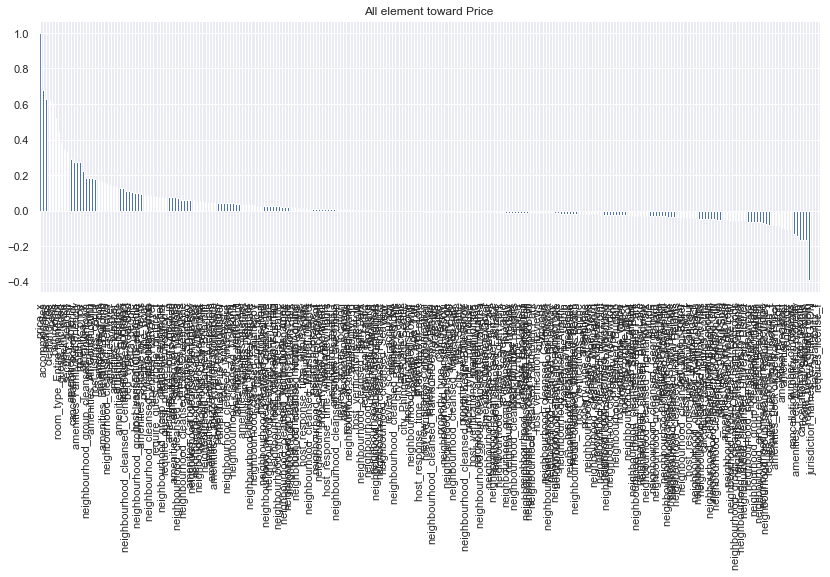

In [197]:
'''
Plot all the value with their correlation to price
'''
plt.figure(figsize=(14,5))
corrs['price_x'].sort_values(ascending=False).plot(kind = 'bar')
plt.title('All element toward Price')

Text(0.5, 1.0, 'Bottom 10')

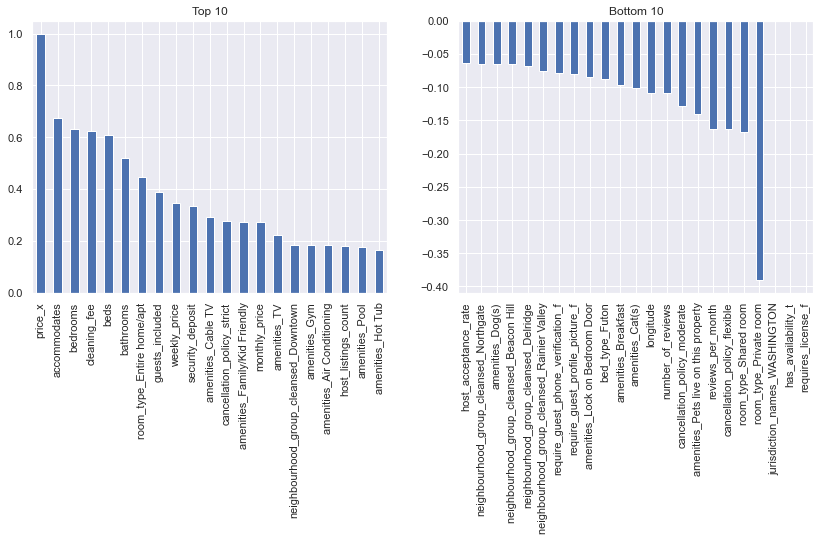

In [199]:
'''
the above graph is real messy, so here we are only going to take a look at the top 20 and bottom 20
'''
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
corrs['price_x'].sort_values(ascending=False)[:21].plot(kind = 'bar')
plt.title('Top 10')

plt.subplot(1,2,2)
corrs['price_x'].sort_values(ascending=False)[-23:].plot(kind = 'bar')
plt.title('Bottom 10')

### 4.2 ML

In [222]:
target = df41['price_x']
feature = df41.drop(columns = 'price_x')
# split data and set 30% test data
feature_train, feature_test, target_train, target_test = train_test_split(feature,
                                                                          target,
                                                                          test_size=0.3,
                                                                          random_state=42)


MemoryError: Unable to allocate 157. MiB for an array with shape (22, 934542) and data type float64

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(feature_train,target_train)

# 
traget_train_preds = forest.predict(feature_train)
traget_test_preds = forest.predict(feature_test)

s1 = reg.score(feature_train,traget_train_preds)
s2 = reg.score(feature_test,traget_test_preds)
print('the predict score on orignal = {}, the predict score on predict = {}'.format(s1,s2))

In [22]:
# this data set is too big for my compute so here I split into 3 data for 3 plot
# 1: for amenities and host_verifications vs price = onedf41
# 2: the rest vs price = twodf41

In [19]:
amenities_and_host_verifications = ['host_verifications_email','host_verifications_phone','host_verifications_reviews',
'host_verifications_kba','host_verifications_facebook','host_verifications_linkedin',
'host_verifications_jumio','host_verifications_google','host_verifications_manual_offline',
'host_verifications_amex','host_verifications_manual_online','host_verifications_sent_id',
'host_verifications_photographer','host_verifications_[]','host_verifications_None',
'host_verifications_weibo','amenities_TV','amenities_Cable TV','amenities_Internet',
'amenities_Wireless Internet','amenities_Air Conditioning',
'amenities_Kitchen','amenities_Heating','amenities_Family/Kid Friendly','amenities_Washer',
'amenities_Dryer','amenities_Free Parking on Premises','amenities_Buzzer/Wireless Intercom',
'amenities_Smoke Detector','amenities_Carbon Monoxide Detector','amenities_First Aid Kit',
'amenities_Safety Card','amenities_Fire Extinguisher','amenities_Essentials',
'amenities_Pets Allowed','amenities_Pets live on this property','amenities_Dog(s)',
'amenities_Cat(s)','amenities_Hot Tub','amenities_Indoor Fireplace','amenities_Shampoo',
'amenities_Breakfast','amenities_24-Hour Check-in','amenities_Hangers','amenities_Hair Dryer',
'amenities_Iron','amenities_Laptop Friendly Workspace','amenities_Suitable for Events',
'amenities_Elevator in Building','amenities_Lock on Bedroom Door','amenities_Wheelchair Accessible',
'amenities_Gym','amenities_','amenities_Pool','amenities_Smoking Allowed','amenities_Other pet(s)',
'amenities_Doorman','amenities_Washer / Dryer']

In [36]:
onedf41 = df41[amenities_and_host_verifications]
onedf41['price'] = df41['price_x']

C:\Users\86130\AppData\Local\Temp/ipykernel_11796/1498602846.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onedf41['price'] = df41['price_x']


In [37]:
twodf41 = df41.drop(columns = amenities_and_host_verifications,
                                 axis = 1)

In [38]:
onedf41.head(3)

host_verifications_email  host_verifications_phone  host_verifications_reviews  host_verifications_kba  host_verifications_facebook  host_verifications_linkedin  host_verifications_jumio  host_verifications_google  host_verifications_manual_offline  host_verifications_amex  host_verifications_manual_online  host_verifications_sent_id  host_verifications_photographer  host_verifications_[]  host_verifications_None  host_verifications_weibo  amenities_TV  amenities_Cable TV  amenities_Internet  amenities_Wireless Internet  amenities_Air Conditioning  amenities_Kitchen  amenities_Heating  amenities_Family/Kid Friendly  amenities_Washer  amenities_Dryer  amenities_Free Parking on Premises  amenities_Buzzer/Wireless Intercom  amenities_Smoke Detector  amenities_Carbon Monoxide Detector  amenities_First Aid Kit  amenities_Safety Card  amenities_Fire Extinguisher  amenities_Essentials  amenities_Pets Allowed  amenities_Pets live on this property  amenities_Dog(s)  amenities_Cat(s)  amenities_Hot Tub  amenities_Indoor Fireplace  amenities_Shampoo  amenities_Breakfast  amenities_24-Hour Check-in  amenities_Hangers  amenities_Hair Dryer  amenities_Iron  amenities_Laptop Friendly Workspace  amenities_Suitable for Events  amenities_Elevator in Building  amenities_Lock on Bedroom Door  amenities_Wheelchair Accessible  amenities_Gym  amenities_  amenities_Pool  amenities_Smoking Allowed  amenities_Other pet(s)  amenities_Doorman  amenities_Washer / Dryer  price
0                         1                         1                           1                       1                            0                            0                         0                          0                                  0                        0                                 0                           0                                0                      0                        0                         0             1                   1                   1                            1                           1                  1                  1                              1                 1                1                                   0                                   0                         0                                   0                        0                      0                            0                     0                       0                                     0                 0                 0                  0                           0                  0                    0                           0                  0                     0               0                                    0                              0                               0                               0                                0              0           0               0                          0                       0                  0                         0   85.0
1                         1                         1                           1                       1                            0                            0                         0                          0                                  0                        0                                 0                           0                                0                      0                        0                         0             1                   1                   1                            1                           1                  1                  1                              1                 1                1                                   0                                   0                         0                                   0                        0                      0                            0                     0                       0                                     0                 0                 0                  0                           0               

In [39]:
twodf41.head(3)

price_x  host_response_rate  host_acceptance_rate  host_listings_count  zipcode   latitude   longitude  accommodates  bathrooms  bedrooms  beds  weekly_price  monthly_price  security_deposit  cleaning_fee  guests_included  extra_people  minimum_nights  maximum_nights  availability_30  availability_60  availability_90  availability_365  number_of_reviews  review_scores_rating  review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  review_scores_communication  review_scores_location  review_scores_value  calculated_host_listings_count  reviews_per_month  month  year  host_since_year  host_response_time_a few days or more  host_response_time_within a day  host_response_time_within a few hours  host_response_time_within an hour  room_type_Entire home/apt  room_type_Private room  room_type_Shared room  property_type_Apartment  property_type_Bed & Breakfast  property_type_Boat  property_type_Bungalow  property_type_Cabin  property_type_Camper/RV  property_type_Chalet  property_type_Condominium  property_type_Dorm  property_type_House  property_type_Loft  property_type_Other  property_type_Tent  property_type_Townhouse  property_type_Treehouse  property_type_Yurt  neighbourhood_cleansed_Adams  neighbourhood_cleansed_Alki  neighbourhood_cleansed_Arbor Heights  neighbourhood_cleansed_Atlantic  neighbourhood_cleansed_Belltown  neighbourhood_cleansed_Bitter Lake  neighbourhood_cleansed_Briarcliff  neighbourhood_cleansed_Brighton  neighbourhood_cleansed_Broadview  neighbourhood_cleansed_Broadway  neighbourhood_cleansed_Bryant  neighbourhood_cleansed_Cedar Park  neighbourhood_cleansed_Central Business District  neighbourhood_cleansed_Columbia City  neighbourhood_cleansed_Crown Hill  neighbourhood_cleansed_Dunlap  neighbourhood_cleansed_East Queen Anne  neighbourhood_cleansed_Eastlake  neighbourhood_cleansed_Fairmount Park  neighbourhood_cleansed_Fauntleroy  neighbourhood_cleansed_First Hill  neighbourhood_cleansed_Fremont  neighbourhood_cleansed_Gatewood  neighbourhood_cleansed_Genesee  neighbourhood_cleansed_Georgetown  neighbourhood_cleansed_Green Lake  neighbourhood_cleansed_Greenwood  neighbourhood_cleansed_Haller Lake  neighbourhood_cleansed_Harrison/Denny-Blaine  neighbourhood_cleansed_High Point  neighbourhood_cleansed_Highland Park  neighbourhood_cleansed_Holly Park  neighbourhood_cleansed_Industrial District  neighbourhood_cleansed_Interbay  neighbourhood_cleansed_International District  neighbourhood_cleansed_Laurelhurst  neighbourhood_cleansed_Lawton Park  neighbourhood_cleansed_Leschi  neighbourhood_cleansed_Lower Queen Anne  neighbourhood_cleansed_Loyal Heights  neighbourhood_cleansed_Madison Park  neighbourhood_cleansed_Madrona  neighbourhood_cleansed_Mann  neighbourhood_cleansed_Maple Leaf  neighbourhood_cleansed_Matthews Beach  neighbourhood_cleansed_Meadowbrook  neighbourhood_cleansed_Mid-Beacon Hill  neighbourhood_cleansed_Minor  neighbourhood_cleansed_Montlake  neighbourhood_cleansed_Mount Baker  neighbourhood_cleansed_North Admiral  neighbourhood_cleansed_North Beach/Blue Ridge  neighbourhood_cleansed_North Beacon Hill  neighbourhood_cleansed_North College Park  neighbourhood_cleansed_North Delridge  neighbourhood_cleansed_North Queen Anne  neighbourhood_cleansed_Olympic Hills  neighbourhood_cleansed_Phinney Ridge  neighbourhood_cleansed_Pike-Market  neighbourhood_cleansed_Pinehurst  neighbourhood_cleansed_Pioneer Square  neighbourhood_cleansed_Portage Bay  neighbourhood_cleansed_Rainier Beach  neighbourhood_cleansed_Ravenna  neighbourhood_cleansed_Riverview  neighbourhood_cleansed_Roosevelt  neighbourhood_cleansed_Roxhill  neighbourhood_cleansed_Seaview  neighbourhood_cleansed_Seward Park  neighbourhood_cleansed_South Beacon Hill  neighbourhood_cleansed_South Delridge  neighbourhood_cleansed_South Lake Union  neighbourhood_cleansed_South Park  neighbourhood_cleansed_Southeast Magnolia  neighbourhood_cleansed_Stevens  neighbourhood_cleansed_Sunset Hill  neighbourhood_cleansed_University District  neig

In [40]:
onecorrs = np.corrcoef(onedf41.values.T)

In [41]:
twocorrs = np.corrcoef(twodf41.values.T)

c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [42]:
onecorrs

array([[ 1.00000000e+00,  1.07602690e-01,  2.36491258e-01, ...,
         3.20537724e-04,  4.34015763e-03,  8.59027661e-03],
       [ 1.07602690e-01,  1.00000000e+00,  5.96053313e-02, ...,
        -1.43088596e-03, -1.68937623e-01, -1.87037694e-02],
       [ 2.36491258e-01,  5.96053313e-02,  1.00000000e+00, ...,
        -3.13914282e-02, -4.08383518e-02, -1.27130967e-02],
       ...,
       [ 3.20537724e-04, -1.43088596e-03, -3.13914282e-02, ...,
         1.00000000e+00, -3.80208161e-03,  1.25590109e-01],
       [ 4.34015763e-03, -1.68937623e-01, -4.08383518e-02, ...,
        -3.80208161e-03,  1.00000000e+00, -9.79287047e-03],
       [ 8.59027661e-03, -1.87037694e-02, -1.27130967e-02, ...,
         1.25590109e-01, -9.79287047e-03,  1.00000000e+00]])

In [43]:
twocorrs

array([[ 1.        , -0.03041567, -0.06356081, ...,  0.08033102,
        -0.07878883,  0.07878883],
       [-0.03041567,  1.        ,  0.68695078, ...,  0.08821886,
        -0.09008635,  0.09008635],
       [-0.06356081,  0.68695078,  1.        , ...,  0.1049079 ,
        -0.11947975,  0.11947975],
       ...,
       [ 0.08033102,  0.08821886,  0.1049079 , ...,  1.        ,
        -0.86778621,  0.86778621],
       [-0.07878883, -0.09008635, -0.11947975, ..., -0.86778621,
         1.        , -1.        ],
       [ 0.07878883,  0.09008635,  0.11947975, ...,  0.86778621,
        -1.        ,  1.        ]])

c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 35199 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 38597 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 22270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 35199 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 38597 missing from current font.
  font.set_text(s, 

<AxesSubplot:>

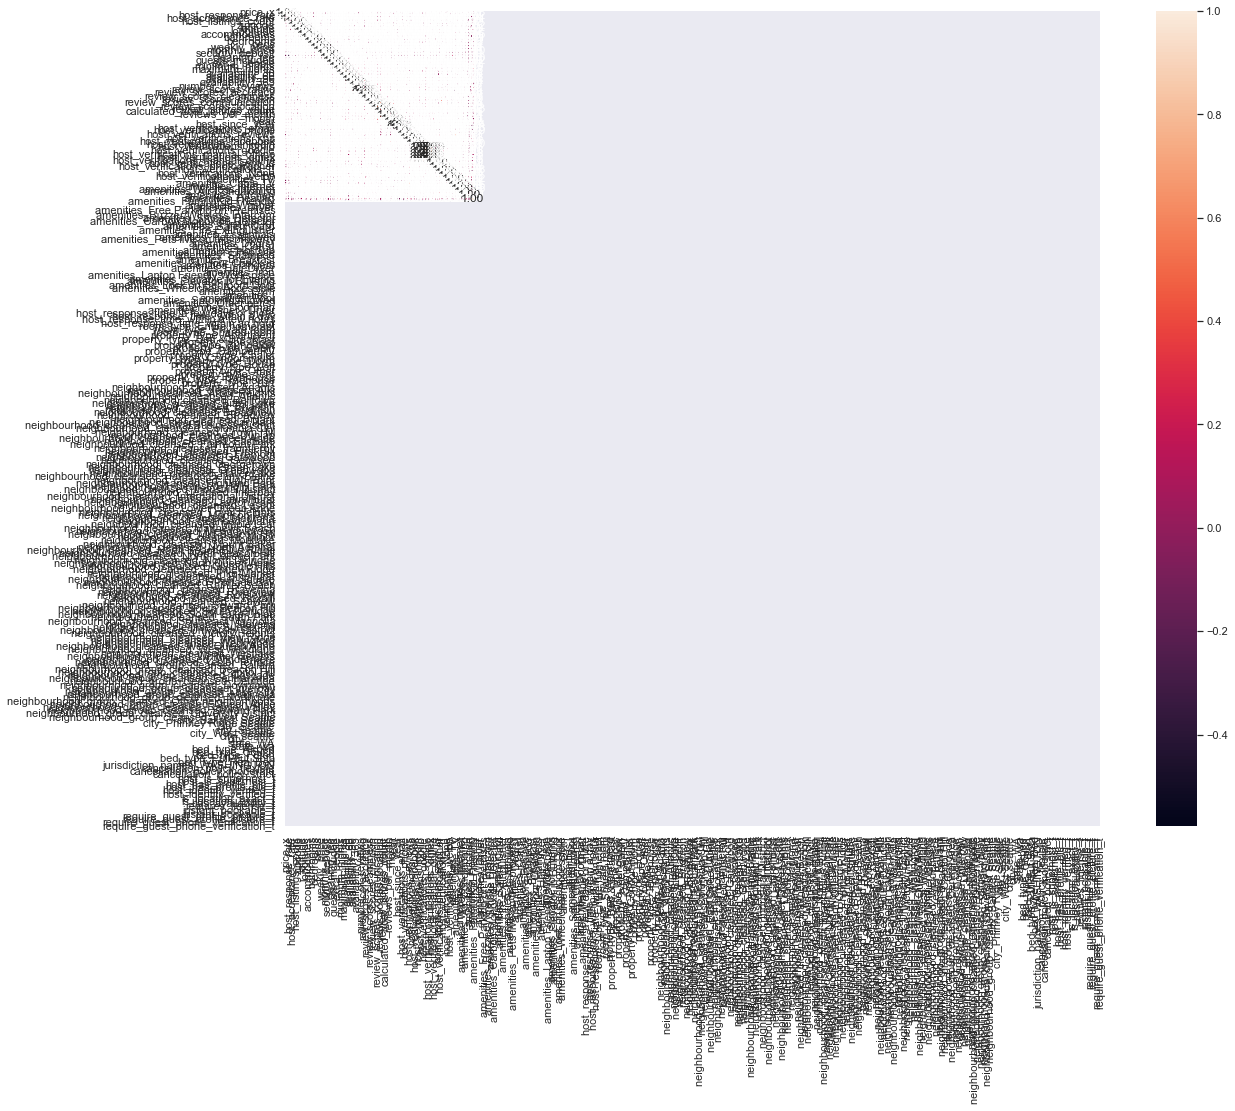

In [54]:
sns.set(font_scale=1)
sns.set(rc={'figure.figsize':(20,15)})
sns.heatmap(onecorrs,
            cbar = True,
            annot=True,
            square = True,
            fmt = '.2f',
            yticklabels = cols,
            xticklabels = cols)


<AxesSubplot:>

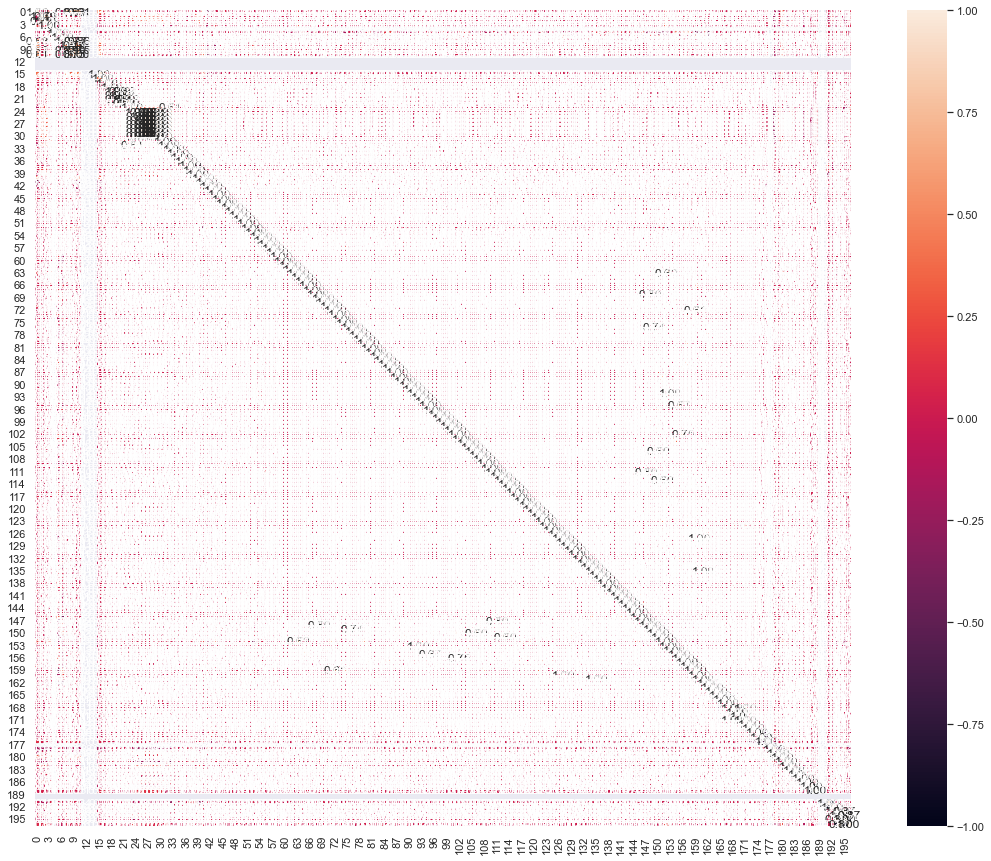

In [53]:
sns.set(font_scale=1)
sns.set(rc={'figure.figsize':(20,15)})
sns.heatmap(twocorrs,
            cbar = True,
            annot=True,
            square = True,
            fmt = '.2f',
            yticklabels = cols,
            xticklabels = cols)

In [67]:
df['extra_people'] = df['extra_people'].apply(lambda x: float(x.split('$')[1].replace(',','')))

In [68]:
df.head(3)

listing_id available  price_x  host_id host_name  host_response_rate  host_acceptance_rate host_listings_count zipcode   latitude   longitude  accommodates bathrooms bedrooms beds price_y weekly_price monthly_price security_deposit cleaning_fee  guests_included  extra_people  minimum_nights  maximum_nights  availability_30  availability_60  availability_90  availability_365  number_of_reviews review_scores_rating review_scores_accuracy review_scores_cleanliness review_scores_checkin review_scores_communication review_scores_location review_scores_value  calculated_host_listings_count reviews_per_month  month  year  host_since_year  host_verifications_email  host_verifications_phone  host_verifications_reviews  host_verifications_kba  host_verifications_facebook  host_verifications_linkedin  host_verifications_jumio  host_verifications_google  host_verifications_manual_offline  host_verifications_amex  host_verifications_manual_online  host_verifications_sent_id  host_verifications_photographer  host_verifications_[]  host_verifications_None  host_verifications_weibo  amenities_TV  amenities_Cable TV  amenities_Internet  amenities_Wireless Internet  amenities_Air Conditioning  amenities_Kitchen  amenities_Heating  amenities_Family/Kid Friendly  amenities_Washer  amenities_Dryer  amenities_Free Parking on Premises  amenities_Buzzer/Wireless Intercom  amenities_Smoke Detector  amenities_Carbon Monoxide Detector  amenities_First Aid Kit  amenities_Safety Card  amenities_Fire Extinguisher  amenities_Essentials  amenities_Pets Allowed  amenities_Pets live on this property  amenities_Dog(s)  amenities_Cat(s)  amenities_Hot Tub  amenities_Indoor Fireplace  amenities_Shampoo  amenities_Breakfast  amenities_24-Hour Check-in  amenities_Hangers  amenities_Hair Dryer  amenities_Iron  amenities_Laptop Friendly Workspace  amenities_Suitable for Events  amenities_Elevator in Building  amenities_Lock on Bedroom Door  amenities_Wheelchair Accessible  amenities_Gym  amenities_  amenities_Pool  amenities_Smoking Allowed  amenities_Other pet(s)  amenities_Doorman  amenities_Washer / Dryer  host_response_time_a few days or more  host_response_time_within a day  host_response_time_within a few hours  host_response_time_within an hour  room_type_Entire home/apt  room_type_Private room  room_type_Shared room  property_type_Apartment  property_type_Bed & Breakfast  property_type_Boat  property_type_Bungalow  property_type_Cabin  property_type_Camper/RV  property_type_Chalet  property_type_Condominium  property_type_Dorm  property_type_House  property_type_Loft  property_type_Other  property_type_Tent  property_type_Townhouse  property_type_Treehouse  property_type_Yurt  neighbourhood_cleansed_Adams  neighbourhood_cleansed_Alki  neighbourhood_cleansed_Arbor Heights  neighbourhood_cleansed_Atlantic  neighbourhood_cleansed_Belltown  neighbourhood_cleansed_Bitter Lake  neighbourhood_cleansed_Briarcliff  neighbourhood_cleansed_Brighton  neighbourhood_cleansed_Broadview  neighbourhood_cleansed_Broadway  neighbourhood_cleansed_Bryant  neighbourhood_cleansed_Cedar Park  neighbourhood_cleansed_Central Business District  neighbourhood_cleansed_Columbia City  neighbourhood_cleansed_Crown Hill  neighbourhood_cleansed_Dunlap  neighbourhood_cleansed_East Queen Anne  neighbourhood_cleansed_Eastlake  neighbourhood_cleansed_Fairmount Park  neighbourhood_cleansed_Fauntleroy  neighbourhood_cleansed_First Hill  neighbourhood_cleansed_Fremont  neighbourhood_cleansed_Gatewood  neighbourhood_cleansed_Genesee  neighbourhood_cleansed_Georgetown  neighbourhood_cleansed_Green Lake  neighbourhood_cleansed_Greenwood  neighbourhood_cleansed_Haller Lake  neighbourhood_cleansed_Harrison/Denny-Blaine  neighbourhood_cleansed_High Point  neighbourhood_cleansed_Highland Park  neighbourhood_cleansed_Holly Park  neighbourhood_cleansed_Industrial District  neighbourhood_cleansed_Interbay  neighbourhood_cleansed_International District  neighbourhood_cleansed_Laurelhurst  neighbourhood_cleans

In [69]:
col = list(df.columns)

In [70]:
col

['listing_id',
 'available',
 'price_x',
 'host_id',
 'host_name',
 'host_response_rate',
 'host_acceptance_rate',
 'host_listings_count',
 'zipcode',
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'price_y',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fee',
 'guests_included',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'calculated_host_listings_count',
 'reviews_per_month',
 'month',
 'year',
 'host_since_year',
 'host_verifications_email',
 'host_verifications_phone',
 'host_verifications_reviews',
 'host_verifications_kba',
 'host_verifications_facebook',
 'host_verifications_linkedin',
 'host_verifications_jumio',
 'host_ver

In [71]:
remove = ['listing_id','host_name','price_y','available']
for i in remove:
    col.remove(i)

In [72]:
corr_df = df[col]

In [73]:
corr_df = corr_df.fillna('0')

In [74]:
corr_df.head(3)

price_x  host_id  host_response_rate  host_acceptance_rate host_listings_count zipcode   latitude   longitude  accommodates bathrooms bedrooms beds weekly_price monthly_price security_deposit cleaning_fee  guests_included  extra_people  minimum_nights  maximum_nights  availability_30  availability_60  availability_90  availability_365  number_of_reviews review_scores_rating review_scores_accuracy review_scores_cleanliness review_scores_checkin review_scores_communication review_scores_location review_scores_value  calculated_host_listings_count reviews_per_month  month  year  host_since_year  host_verifications_email  host_verifications_phone  host_verifications_reviews  host_verifications_kba  host_verifications_facebook  host_verifications_linkedin  host_verifications_jumio  host_verifications_google  host_verifications_manual_offline  host_verifications_amex  host_verifications_manual_online  host_verifications_sent_id  host_verifications_photographer  host_verifications_[]  host_verifications_None  host_verifications_weibo  amenities_TV  amenities_Cable TV  amenities_Internet  amenities_Wireless Internet  amenities_Air Conditioning  amenities_Kitchen  amenities_Heating  amenities_Family/Kid Friendly  amenities_Washer  amenities_Dryer  amenities_Free Parking on Premises  amenities_Buzzer/Wireless Intercom  amenities_Smoke Detector  amenities_Carbon Monoxide Detector  amenities_First Aid Kit  amenities_Safety Card  amenities_Fire Extinguisher  amenities_Essentials  amenities_Pets Allowed  amenities_Pets live on this property  amenities_Dog(s)  amenities_Cat(s)  amenities_Hot Tub  amenities_Indoor Fireplace  amenities_Shampoo  amenities_Breakfast  amenities_24-Hour Check-in  amenities_Hangers  amenities_Hair Dryer  amenities_Iron  amenities_Laptop Friendly Workspace  amenities_Suitable for Events  amenities_Elevator in Building  amenities_Lock on Bedroom Door  amenities_Wheelchair Accessible  amenities_Gym  amenities_  amenities_Pool  amenities_Smoking Allowed  amenities_Other pet(s)  amenities_Doorman  amenities_Washer / Dryer  host_response_time_a few days or more  host_response_time_within a day  host_response_time_within a few hours  host_response_time_within an hour  room_type_Entire home/apt  room_type_Private room  room_type_Shared room  property_type_Apartment  property_type_Bed & Breakfast  property_type_Boat  property_type_Bungalow  property_type_Cabin  property_type_Camper/RV  property_type_Chalet  property_type_Condominium  property_type_Dorm  property_type_House  property_type_Loft  property_type_Other  property_type_Tent  property_type_Townhouse  property_type_Treehouse  property_type_Yurt  neighbourhood_cleansed_Adams  neighbourhood_cleansed_Alki  neighbourhood_cleansed_Arbor Heights  neighbourhood_cleansed_Atlantic  neighbourhood_cleansed_Belltown  neighbourhood_cleansed_Bitter Lake  neighbourhood_cleansed_Briarcliff  neighbourhood_cleansed_Brighton  neighbourhood_cleansed_Broadview  neighbourhood_cleansed_Broadway  neighbourhood_cleansed_Bryant  neighbourhood_cleansed_Cedar Park  neighbourhood_cleansed_Central Business District  neighbourhood_cleansed_Columbia City  neighbourhood_cleansed_Crown Hill  neighbourhood_cleansed_Dunlap  neighbourhood_cleansed_East Queen Anne  neighbourhood_cleansed_Eastlake  neighbourhood_cleansed_Fairmount Park  neighbourhood_cleansed_Fauntleroy  neighbourhood_cleansed_First Hill  neighbourhood_cleansed_Fremont  neighbourhood_cleansed_Gatewood  neighbourhood_cleansed_Genesee  neighbourhood_cleansed_Georgetown  neighbourhood_cleansed_Green Lake  neighbourhood_cleansed_Greenwood  neighbourhood_cleansed_Haller Lake  neighbourhood_cleansed_Harrison/Denny-Blaine  neighbourhood_cleansed_High Point  neighbourhood_cleansed_Highland Park  neighbourhood_cleansed_Holly Park  neighbourhood_cleansed_Industrial District  neighbourhood_cleansed_Interbay  neighbourhood_cleansed_International District  neighbourhood_cleansed_Laurelhurst  neighbourhood_cleansed_Lawton Park  neighbourhood_cleansed_L

In [75]:
corr_df = corr_df.apply(pd.to_numeric, errors='coerce')

In [76]:
corr_df

price_x   host_id  host_response_rate  host_acceptance_rate  host_listings_count  zipcode   latitude   longitude  accommodates  bathrooms  bedrooms  beds  weekly_price  monthly_price  security_deposit  cleaning_fee  guests_included  extra_people  minimum_nights  maximum_nights  availability_30  availability_60  availability_90  availability_365  number_of_reviews  review_scores_rating  review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  review_scores_communication  review_scores_location  review_scores_value  calculated_host_listings_count  reviews_per_month  month  year  host_since_year  host_verifications_email  host_verifications_phone  host_verifications_reviews  host_verifications_kba  host_verifications_facebook  host_verifications_linkedin  host_verifications_jumio  host_verifications_google  host_verifications_manual_offline  host_verifications_amex  host_verifications_manual_online  host_verifications_sent_id  host_verifications_photographer  host_verifications_[]  host_verifications_None  host_verifications_weibo  amenities_TV  amenities_Cable TV  amenities_Internet  amenities_Wireless Internet  amenities_Air Conditioning  amenities_Kitchen  amenities_Heating  amenities_Family/Kid Friendly  amenities_Washer  amenities_Dryer  amenities_Free Parking on Premises  amenities_Buzzer/Wireless Intercom  amenities_Smoke Detector  amenities_Carbon Monoxide Detector  amenities_First Aid Kit  amenities_Safety Card  amenities_Fire Extinguisher  amenities_Essentials  amenities_Pets Allowed  amenities_Pets live on this property  amenities_Dog(s)  amenities_Cat(s)  amenities_Hot Tub  amenities_Indoor Fireplace  amenities_Shampoo  amenities_Breakfast  amenities_24-Hour Check-in  amenities_Hangers  amenities_Hair Dryer  amenities_Iron  amenities_Laptop Friendly Workspace  amenities_Suitable for Events  amenities_Elevator in Building  amenities_Lock on Bedroom Door  amenities_Wheelchair Accessible  amenities_Gym  amenities_  amenities_Pool  amenities_Smoking Allowed  amenities_Other pet(s)  amenities_Doorman  amenities_Washer / Dryer  host_response_time_a few days or more  host_response_time_within a day  host_response_time_within a few hours  host_response_time_within an hour  room_type_Entire home/apt  room_type_Private room  room_type_Shared room  property_type_Apartment  property_type_Bed & Breakfast  property_type_Boat  property_type_Bungalow  property_type_Cabin  property_type_Camper/RV  property_type_Chalet  property_type_Condominium  property_type_Dorm  property_type_House  property_type_Loft  property_type_Other  property_type_Tent  property_type_Townhouse  property_type_Treehouse  property_type_Yurt  neighbourhood_cleansed_Adams  neighbourhood_cleansed_Alki  neighbourhood_cleansed_Arbor Heights  neighbourhood_cleansed_Atlantic  neighbourhood_cleansed_Belltown  neighbourhood_cleansed_Bitter Lake  neighbourhood_cleansed_Briarcliff  neighbourhood_cleansed_Brighton  neighbourhood_cleansed_Broadview  neighbourhood_cleansed_Broadway  neighbourhood_cleansed_Bryant  neighbourhood_cleansed_Cedar Park  neighbourhood_cleansed_Central Business District  neighbourhood_cleansed_Columbia City  neighbourhood_cleansed_Crown Hill  neighbourhood_cleansed_Dunlap  neighbourhood_cleansed_East Queen Anne  neighbourhood_cleansed_Eastlake  neighbourhood_cleansed_Fairmount Park  neighbourhood_cleansed_Fauntleroy  neighbourhood_cleansed_First Hill  neighbourhood_cleansed_Fremont  neighbourhood_cleansed_Gatewood  neighbourhood_cleansed_Genesee  neighbourhood_cleansed_Georgetown  neighbourhood_cleansed_Green Lake  neighbourhood_cleansed_Greenwood  neighbourhood_cleansed_Haller Lake  neighbourhood_cleansed_Harrison/Denny-Blaine  neighbourhood_cleansed_High Point  neighbourhood_cleansed_Highland Park  neighbourhood_cleansed_Holly Park  neighbourhood_cleansed_Industrial District  neighbourhood_cleansed_Interbay  neighbourhood_cleansed_International District  neighbourhood_cleansed_Laurelhurst  neighbourhood_cleansed_Lawton Park  neighb

In [77]:
corr_df.dtypes

price_x                                             float64
host_id                                               int64
host_response_rate                                  float64
host_acceptance_rate                                float64
host_listings_count                                 float64
zipcode                                             float64
latitude                                            float64
longitude                                           float64
accommodates                                          int64
bathrooms                                           float64
bedrooms                                            float64
beds                                                float64
weekly_price                                        float64
monthly_price                                       float64
security_deposit                                    float64
cleaning_fee                                        float64
guests_included                         

In [79]:
np.corrcoef(corr_df.values.T)

c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


array([[ 1.        , -0.07636803, -0.03041567, ...,  0.08033102,
        -0.07878883,  0.07878883],
       [-0.07636803,  1.        , -0.0885928 , ..., -0.25597838,
         0.28840094, -0.28840094],
       [-0.03041567, -0.0885928 ,  1.        , ...,  0.08821886,
        -0.09008635,  0.09008635],
       ...,
       [ 0.08033102, -0.25597838,  0.08821886, ...,  1.        ,
        -0.86778621,  0.86778621],
       [-0.07878883,  0.28840094, -0.09008635, ..., -0.86778621,
         1.        , -1.        ],
       [ 0.07878883, -0.28840094,  0.09008635, ...,  0.86778621,
        -1.        ,  1.        ]])

In [80]:
import seaborn as sns

In [82]:
sns.set(font_scale=1)
sns.set(rc={'figure.figsize':(7,7)})

c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 35199 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 38597 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 22270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 35199 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 38597 missing from current font.
  font.set_text(s, 

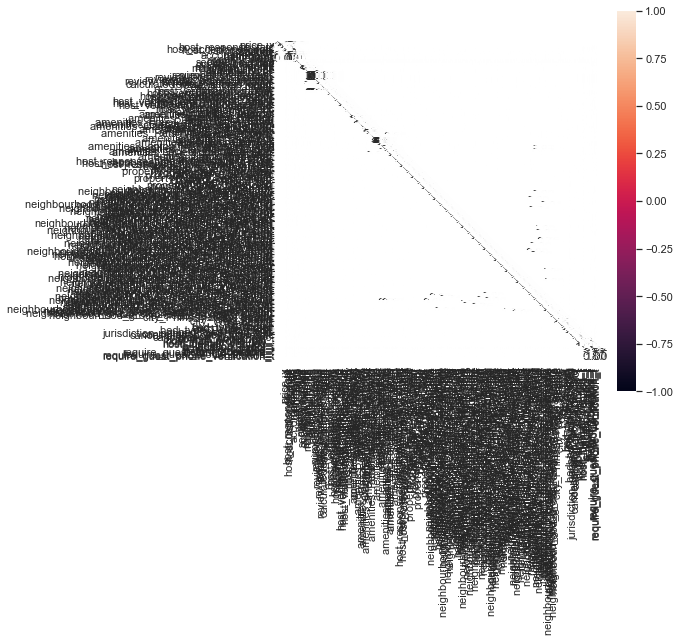

In [89]:
hm=sns.heatmap(corrs, cbar = True, annot=True, square = True, fmt = '.2f',
              yticklabels = cols, xticklabels = cols)

In [83]:
corrs = np.corrcoef(corr_df.values.T)

c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [84]:
corrs

array([[ 1.        , -0.07636803, -0.03041567, ...,  0.08033102,
        -0.07878883,  0.07878883],
       [-0.07636803,  1.        , -0.0885928 , ..., -0.25597838,
         0.28840094, -0.28840094],
       [-0.03041567, -0.0885928 ,  1.        , ...,  0.08821886,
        -0.09008635,  0.09008635],
       ...,
       [ 0.08033102, -0.25597838,  0.08821886, ...,  1.        ,
        -0.86778621,  0.86778621],
       [-0.07878883,  0.28840094, -0.09008635, ..., -0.86778621,
         1.        , -1.        ],
       [ 0.07878883, -0.28840094,  0.09008635, ...,  0.86778621,
        -1.        ,  1.        ]])

In [88]:
cols = col

In [87]:
col

['price_x',
 'host_id',
 'host_response_rate',
 'host_acceptance_rate',
 'host_listings_count',
 'zipcode',
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fee',
 'guests_included',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'calculated_host_listings_count',
 'reviews_per_month',
 'month',
 'year',
 'host_since_year',
 'host_verifications_email',
 'host_verifications_phone',
 'host_verifications_reviews',
 'host_verifications_kba',
 'host_verifications_facebook',
 'host_verifications_linkedin',
 'host_verifications_jumio',
 'host_verifications_google',
 'host_verifications_manual_offline

In [ ]:
# def get_list(x):
#     list = []
#     for method in x.split("', '"):
#         method = method.replace("['",'').replace("']",'')
#         list.append(method)
#
#     return list





# print(p.host_verifications.apply(lambda x: get_list(x)))